## Initial data read-in/prep

In [1]:
# Update sklearn 

# !pip install sklearn --upgrade

In [2]:
# Update tensorflow

# !pip install tensorflow --upgrade

In [3]:
# Import dependencies

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn import tree
from sklearn import preprocessing
from sklearn.linear_model import Linear Regression
import pandas as pd
import numpy as np
from numpy import asarray
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [4]:
# from tensorflow.keras.utils import to_categorical

In [5]:
# Read the census csv into a pandas DataFrame

census = pd.read_csv('../Resources/Tableau_clean/census_all.csv')
census.head()

,State,year,Name,Population,HHI,PovertyRate
0,1,2011,Alabama,4747424,42934,17.133186
1,2,2011,Alaska,700703,69014,9.292239
2,4,2011,Arizona,6337373,50752,15.835820
3,5,2011,Arkansas,2895928,40149,17.846507
4,6,2011,California,36969200,61632,14.096818


In [6]:
# rename State column for joining

census = census.rename(columns={'Name': 'state_name'})
census

,State,year,state_name,Population,HHI,PovertyRate
0,1,2011,Alabama,4747424,42934,17.133186
1,2,2011,Alaska,700703,69014,9.292239
2,4,2011,Arizona,6337373,50752,15.835820
3,5,2011,Arkansas,2895928,40149,17.846507
4,6,2011,California,36969200,61632,14.096818
...,...,...,...,...,...,...
250,51,2015,Virginia,8256630,65015,11.164628
251,53,2015,Washington,6985464,61062,13.005750
252,54,2015,West Virginia,1851420,41751,17.466809
253,55,2015,Wisconsin,5742117,53357,12.614651


In [7]:
# Read the medicare csv into a pandas DataFrame

medicare = pd.read_csv('../Resources/Tableau_clean/medicare_all.csv')
medicare

,state_id,year,state_name,beneficiaries_part_b,one_ambulatory_visit,diabetic_enrollees_age_65_to_75,average_diabetic_enrollees_hemoglobin_a1c_test,average_diabetic_enrollees_eye_exam,average_diabetic_enrollees_blood_lipids_test,average_female_enrollees_age_67_to_69,average_female_age_67_to_69_mammogram,beneficiaries_part_a_eligible,leg_amputations_per_1000_enrollees,discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees
0,1.0,2011,Alabama,478784.0,82.5,69691.0,83.9,63.3,80.3,42267.0,62.8,501422.0,0.99,76.4
1,2.0,2011,Alaska,49648.0,70.9,5449.0,74.5,55.8,66.9,5151.0,55.3,54928.0,0.81,53.1
2,3.0,2011,Arizona,465298.0,78.2,50991.0,78.5,66.1,75.8,43614.0,64.3,501103.0,0.57,51.4
3,4.0,2011,Arkansas,327939.0,80.7,40202.0,82.5,66.1,76.2,29290.0,58.3,345431.0,0.85,77.0
4,5.0,2011,California,2238140.0,72.7,243999.0,80.6,64.1,78.0,190971.0,59.0,2378472.0,0.63,49.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,49.0,2015,Virginia,832699.0,83.3,98165.0,87.6,70.0,82.0,83135.0,64.5,703266.0,0.53,42.8
251,50.0,2015,Washington,610922.0,78.5,56474.0,86.6,67.7,76.3,56238.0,60.0,510796.0,0.46,32.7
252,51.0,2015,West Virginia,206961.0,80.8,29239.0,84.7,59.9,78.2,20777.0,59.1,171837.0,0.90,75.0
253,52.0,2015,Wisconsin,474364.0,79.8,46596.0,91.0,69.7,81.6,44595.0,71.9,418646.0,0.65,45.0


In [8]:
# Identify column names for joining

list(medicare.columns) 

['state_id',
 'year',
 'state_name',
 'beneficiaries_part_b',
 'one_ambulatory_visit',
 'diabetic_enrollees_age_65_to_75',
 'average_diabetic_enrollees_hemoglobin_a1c_test',
 'average_diabetic_enrollees_eye_exam',
 'average_diabetic_enrollees_blood_lipids_test',
 'average_female_enrollees_age_67_to_69',
 'average_female_age_67_to_69_mammogram',
 'beneficiaries_part_a_eligible',
 'leg_amputations_per_1000_enrollees',
 'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees']

In [9]:
# join csvs

data = pd.merge(census,
                 medicare[['state_id', 'state_name', 'beneficiaries_part_b', 'one_ambulatory_visit', 'diabetic_enrollees_age_65_to_75',
 'average_diabetic_enrollees_hemoglobin_a1c_test', 'average_diabetic_enrollees_eye_exam', 'average_diabetic_enrollees_blood_lipids_test',
 'average_female_enrollees_age_67_to_69', 'average_female_age_67_to_69_mammogram', 'beneficiaries_part_a_eligible', 'leg_amputations_per_1000_enrollees',
 'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees']],
                 on='state_name')
data

,State,year,state_name,Population,HHI,PovertyRate,state_id,beneficiaries_part_b,one_ambulatory_visit,diabetic_enrollees_age_65_to_75,average_diabetic_enrollees_hemoglobin_a1c_test,average_diabetic_enrollees_eye_exam,average_diabetic_enrollees_blood_lipids_test,average_female_enrollees_age_67_to_69,average_female_age_67_to_69_mammogram,beneficiaries_part_a_eligible,leg_amputations_per_1000_enrollees,discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees
0,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,83.9,63.3,80.3,42267.0,62.8,501422.0,0.99,76.4
1,1,2011,Alabama,4747424,42934,17.133186,1.0,492195.0,82.8,72392.0,84.2,63.2,80.7,42535.0,62.7,517526.0,0.90,71.5
2,1,2011,Alabama,4747424,42934,17.133186,1.0,498123.0,83.3,74492.0,84.9,63.8,81.8,44502.0,62.7,525015.0,0.87,65.4
3,1,2011,Alabama,4747424,42934,17.133186,1.0,506023.0,83.2,76238.0,85.0,63.7,81.1,48751.0,62.8,534296.0,0.83,61.1
4,1,2011,Alabama,4747424,42934,17.133186,1.0,510586.0,83.3,68202.0,86.1,64.0,81.0,52169.0,63.1,404987.0,0.79,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,56,2015,Wyoming,579679,58840,11.212240,53.0,61634.0,73.0,5750.0,74.7,64.7,58.7,5517.0,57.4,65932.0,0.62,55.2
1271,56,2015,Wyoming,579679,58840,11.212240,53.0,64431.0,73.3,6017.0,74.7,63.8,59.4,5519.0,57.9,69056.0,0.46,52.7
1272,56,2015,Wyoming,579679,58840,11.212240,53.0,68066.0,74.6,6475.0,75.4,62.7,60.2,5844.0,57.1,73043.0,0.67,47.9
1273,56,2015,Wyoming,579679,58840,11.212240,53.0,70457.0,73.8,6832.0,76.7,63.2,59.7,6498.0,56.3,75824.0,0.38,46.1


In [10]:
# read in Pollution data

pollution = pd.read_csv('../Resources/Tableau_clean/pollution_all.csv')
pollution

,state_name,Days_with_AQI,Year,Good_Days,Moderate_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Days_CO,Days_NO2,Days_Ozone,Days_SO2,Days_PM2.5,Days_PM10
0,Alabama,248.53,2011,171.79,72.37,0.37,0.00,0.37,0.11,0.00,158.63,0.16,84.89,4.74
1,Alaska,274.50,2011,235.25,34.88,0.62,0.12,0.62,2.12,0.00,75.62,0.00,176.25,20.50
2,Arizona,320.62,2011,177.15,117.00,2.38,1.00,2.38,0.00,3.15,167.15,16.54,27.77,106.00
3,Arkansas,216.88,2011,154.47,59.18,0.12,0.00,0.12,0.00,3.00,108.76,14.76,90.35,0.00
4,California,345.65,2011,193.17,120.37,7.02,0.37,7.02,0.17,6.91,197.43,0.09,129.24,11.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Virginia,261.00,2015,228.14,32.34,0.00,0.00,0.00,1.14,35.06,141.26,0.97,73.66,8.91
251,Washington,345.83,2015,292.76,48.14,1.03,0.07,1.03,0.00,2.69,47.45,0.00,290.21,5.48
252,West Virginia,280.47,2015,234.07,45.20,0.07,0.00,0.07,0.13,0.00,145.53,40.47,81.20,13.13
253,Wisconsin,291.79,2015,245.86,42.68,0.07,0.00,0.07,0.00,0.71,191.43,14.54,84.86,0.25


In [11]:
# join csvs

data_all = pd.merge(data, pollution,on='state_name')
data_all

,State,year,state_name,Population,HHI,PovertyRate,state_id,beneficiaries_part_b,one_ambulatory_visit,diabetic_enrollees_age_65_to_75,...,Moderate_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days,Days_CO,Days_NO2,Days_Ozone,Days_SO2,Days_PM2.5,Days_PM10
0,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,...,72.37,0.37,0.00,0.37,0.11,0.00,158.63,0.16,84.89,4.74
1,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,...,58.82,0.24,0.00,0.24,0.00,0.00,174.53,0.41,85.12,3.53
2,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,...,40.11,0.00,0.00,0.00,0.00,0.06,173.17,4.67,84.06,3.22
3,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,...,46.11,0.00,0.00,0.00,0.00,0.39,173.06,0.11,83.61,3.28
4,1,2011,Alabama,4747424,42934,17.133186,1.0,478784.0,82.5,69691.0,...,68.28,0.17,0.00,0.17,0.00,0.61,137.56,0.33,145.56,3.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6120,56,2015,Wyoming,579679,58840,11.212240,53.0,72959.0,72.7,6146.0,...,60.16,0.26,0.16,0.26,0.21,3.21,176.32,21.05,30.53,66.68
6121,56,2015,Wyoming,579679,58840,11.212240,53.0,72959.0,72.7,6146.0,...,80.95,0.63,0.05,0.63,0.05,5.68,182.21,20.37,27.74,72.37
6122,56,2015,Wyoming,579679,58840,11.212240,53.0,72959.0,72.7,6146.0,...,60.00,0.06,0.00,0.06,0.00,3.83,246.89,3.67,20.39,44.22
6123,56,2015,Wyoming,579679,58840,11.212240,53.0,72959.0,72.7,6146.0,...,43.32,0.32,0.00,0.32,0.00,5.11,233.84,2.58,28.42,40.37


## Trial 1: Comparing Household Income and Population to Medicare Part B Beneficiaries

### Set features

In [12]:
# Identify column names 

list(data_all.columns) 

['State',
 'year',
 'state_name',
 'Population',
 'HHI',
 'PovertyRate',
 'state_id',
 'beneficiaries_part_b',
 'one_ambulatory_visit',
 'diabetic_enrollees_age_65_to_75',
 'average_diabetic_enrollees_hemoglobin_a1c_test',
 'average_diabetic_enrollees_eye_exam',
 'average_diabetic_enrollees_blood_lipids_test',
 'average_female_enrollees_age_67_to_69',
 'average_female_age_67_to_69_mammogram',
 'beneficiaries_part_a_eligible',
 'leg_amputations_per_1000_enrollees',
 'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees',
 'Days_with_AQI',
 'Year',
 'Good_Days',
 'Moderate_Days',
 'Unhealthy_Days',
 'Very_Unhealthy_Days',
 'Hazardous_Days',
 'Days_CO',
 'Days_NO2',
 'Days_Ozone',
 'Days_SO2',
 'Days_PM2.5',
 'Days_PM10']

In [13]:
features = data_all[['Population', 'PovertyRate']]
y_data = data_all[['beneficiaries_part_b']]

### Train/Test/Split: 
<br>
Use part of our data to train the algorithm, and part of it to evaluate how well the algorithm does.

In [14]:
# get X and y variables
y = y_data
X = features

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

,Population,PovertyRate
539,37325068,14.976798
2919,2967620,21.570551
26,4777326,17.631035
3190,998554,14.874308
3152,990785,14.445011


### Standard Scaler

In [16]:
# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[211 101 101 ... 237  51  40]


C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Training the model

In [17]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [18]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.1530590028303941
Testing Data Score: 0.0926892950391645


In [19]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

# low precision scores indicate we need different data to evaluate

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.07      0.33      0.11         6
           4       0.00      0.00      0.00         7
           5       0.08      0.17      0.11         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         6
          13       0.12      0.83      0.22         6
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         7
          17       0.00    

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [20]:
target = data_all["beneficiaries_part_b"]
target_names = data_all["beneficiaries_part_b"]

In [21]:
data = data_all.drop("beneficiaries_part_b", axis=1)
data = data.drop("state_name", axis=1)
feature_names = data.columns

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [25]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# shows the features most likely to make good predictions

[(0.08647496702534946,
  'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees'),
 (0.08477144810985966, 'average_female_enrollees_age_67_to_69'),
 (0.08094273530406029, 'average_diabetic_enrollees_hemoglobin_a1c_test'),
 (0.08091560709625481, 'one_ambulatory_visit'),
 (0.08088327090863957, 'average_diabetic_enrollees_blood_lipids_test'),
 (0.08076978303138017, 'leg_amputations_per_1000_enrollees'),
 (0.07992017812696549, 'average_female_age_67_to_69_mammogram'),
 (0.07912477023867939, 'beneficiaries_part_a_eligible'),
 (0.07860314610751411, 'diabetic_enrollees_age_65_to_75'),
 (0.07751666202508446, 'average_diabetic_enrollees_eye_exam'),
 (0.024206036915824486, 'state_id'),
 (0.022483655230185102, 'Population'),
 (0.02203430747434673, 'State'),
 (0.018955954997390768, 'HHI'),
 (0.01496701321958107, 'Days_PM10'),
 (0.014765998709163996, 'PovertyRate'),
 (0.013672101339385716, 'Days_PM2.5'),
 (0.012730763586957109, 'Days_Ozone'),
 (0.01012117273159476, 'Days_NO2'),
 (0.009

## Trial 2: New Features
## Comparing Ambulatory Discharges and Ambulatory Visits to Medicare Part B Beneficiaries

### Set features

In [26]:
features = data_all[['discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees', 'average_diabetic_enrollees_blood_lipids_test']]
y_data2 = data_all[['beneficiaries_part_b']]

### Train/Test/Split: 
<br>
Use part of our data to train the algorithm, and part of it to evaluate how well the algorithm does.

In [27]:
# get X and y variables
y = y_data
X = features

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

,discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees,average_diabetic_enrollees_blood_lipids_test
539,40.7,79.3
2919,67.8,76.7
26,76.4,80.3
3190,39.8,69.0
3152,51.7,72.1


### Standard Scaler

In [29]:
# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[211 101 101 ... 237  51  40]


C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Training the model

In [30]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [31]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.7805355976485957
Testing Data Score: 0.7441253263707572


In [32]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

# These features show higher precision scores - but only one dataset is being used.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         6
           6       0.46      1.00      0.63         6
           7       0.50      1.00      0.67         7
           8       0.00      0.00      0.00         7
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         6
          12       0.46      1.00      0.63         6
          13       1.00      1.00      1.00         6
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         7
          17       1.00    

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Trial 3: New "y" Data, and Features
## Comparing Comparing Pollutant (Nitrogen Dioxide and Sulfur Dioxide) Levels to Household Income

### Set features

In [33]:
# Identify column names 

list(data_all.columns) 

['State',
 'year',
 'state_name',
 'Population',
 'HHI',
 'PovertyRate',
 'state_id',
 'beneficiaries_part_b',
 'one_ambulatory_visit',
 'diabetic_enrollees_age_65_to_75',
 'average_diabetic_enrollees_hemoglobin_a1c_test',
 'average_diabetic_enrollees_eye_exam',
 'average_diabetic_enrollees_blood_lipids_test',
 'average_female_enrollees_age_67_to_69',
 'average_female_age_67_to_69_mammogram',
 'beneficiaries_part_a_eligible',
 'leg_amputations_per_1000_enrollees',
 'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees',
 'Days_with_AQI',
 'Year',
 'Good_Days',
 'Moderate_Days',
 'Unhealthy_Days',
 'Very_Unhealthy_Days',
 'Hazardous_Days',
 'Days_CO',
 'Days_NO2',
 'Days_Ozone',
 'Days_SO2',
 'Days_PM2.5',
 'Days_PM10']

In [34]:
features = data_all[['Days_NO2', 'Days_SO2']]
y_data = data_all[['HHI']]

### Train/Test/Split: 

In [35]:
# get X and y variables
y = y_data
X = features

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

,Days_NO2,Days_SO2
4995,9.67,0.00
5559,35.06,0.97
611,6.76,0.09
3422,0.80,0.00
4637,1.33,0.00


### Standard Scaler

In [37]:
# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[ 61 140 171 ... 158 117 158]


C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Training the model

In [38]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [39]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.07968647942521227
Testing Data Score: 0.05156657963446475


In [40]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

# low precision scores indicate we need different data to evaluate

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.09      0.67      0.16         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         6
          11       0.06      0.50      0.11         6
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00         7
          15       0.13      0.33      0.19         6
          16       0.00      0.00      0.00         6
          17       0.00    

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [41]:
target = data_all["HHI"]
target_names = data_all["HHI"]

In [42]:
data = data_all.drop("HHI", axis=1)
data = data.drop("state_name", axis=1)
feature_names = data.columns

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [46]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# shows the features most likely to make good predictions

[(0.21296702929481867, 'PovertyRate'),
 (0.2120303378174101, 'Population'),
 (0.18237146305387789, 'year'),
 (0.0299812148266366, 'state_id'),
 (0.02843655083215746, 'State'),
 (0.026586220688208508, 'beneficiaries_part_b'),
 (0.025224591560444112, 'average_diabetic_enrollees_eye_exam'),
 (0.02265009151387608, 'diabetic_enrollees_age_65_to_75'),
 (0.020465055197379418, 'average_female_age_67_to_69_mammogram'),
 (0.020039362297317398, 'Days_PM10'),
 (0.019733676578383867, 'average_female_enrollees_age_67_to_69'),
 (0.017810979027268064, 'one_ambulatory_visit'),
 (0.0177284100722464, 'Days_PM2.5'),
 (0.017484002644516255, 'Days_Ozone'),
 (0.017467958905004848, 'average_diabetic_enrollees_hemoglobin_a1c_test'),
 (0.01669010919474414, 'average_diabetic_enrollees_blood_lipids_test'),
 (0.01611780454455719, 'Days_SO2'),
 (0.014593973943869666, 'Days_NO2'),
 (0.014383744368862087, 'beneficiaries_part_a_eligible'),
 (0.014126448497382304, 'Days_with_AQI'),
 (0.009360714863645715, 'Good_Days'),

## Trial 4: New Features
## Comparing Income and Part B Beneficiaries to Poverty Rate

### Set features

In [47]:
features = data_all[['beneficiaries_part_b', 'HHI']]
y_data = data_all[['PovertyRate']]

### Train/Test/Split: 

In [48]:
# get X and y variables
y = y_data
X = features

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

,beneficiaries_part_b,HHI
1509,1331041.0,56576
1634,637290.0,48393
3981,1470999.0,59269
2760,277556.0,58476
857,344798.0,70331


### Standard Scaler

In [50]:
# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[  7 113 113 ...  75  44  29]


C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Training the model

In [51]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [52]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.6969301110385369
Testing Data Score: 0.6488250652741514


In [53]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

# low precision scores indicate we need different data to evaluate

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.30      1.00      0.46         6
           2       0.00      0.00      0.00         7
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       0.46      1.00      0.63         6
           6       1.00      1.00      1.00         6
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         6
          11       0.00      0.00      0.00         7
          12       0.46      1.00      0.63         6
          13       1.00      1.00      1.00         6
          14       0.00      0.00      0.00         7
          15       1.00      1.00      1.00         6
          16       0.46      1.00      0.63         6
          17       1.00    

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [54]:
target = data_all["PovertyRate"]
target_names = data_all["PovertyRate"]

In [55]:
data = data_all.drop("PovertyRate", axis=1)
data = data.drop("state_name", axis=1)
feature_names = data.columns

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [171]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=200)
# rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

In [ ]:
# sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# # shows the features most likely to make good predictions

## Trial 5: New Features
## Comparing Income, Part B Beneficiaries, and Unhealthy Days
## to Poverty Rate

### Set features

In [58]:
# Identify column names 

list(data_all.columns) 

['State',
 'year',
 'state_name',
 'Population',
 'HHI',
 'PovertyRate',
 'state_id',
 'beneficiaries_part_b',
 'one_ambulatory_visit',
 'diabetic_enrollees_age_65_to_75',
 'average_diabetic_enrollees_hemoglobin_a1c_test',
 'average_diabetic_enrollees_eye_exam',
 'average_diabetic_enrollees_blood_lipids_test',
 'average_female_enrollees_age_67_to_69',
 'average_female_age_67_to_69_mammogram',
 'beneficiaries_part_a_eligible',
 'leg_amputations_per_1000_enrollees',
 'discharges_ambulatory_care_sensitive_conditions_per_1000_enrollees',
 'Days_with_AQI',
 'Year',
 'Good_Days',
 'Moderate_Days',
 'Unhealthy_Days',
 'Very_Unhealthy_Days',
 'Hazardous_Days',
 'Days_CO',
 'Days_NO2',
 'Days_Ozone',
 'Days_SO2',
 'Days_PM2.5',
 'Days_PM10']

In [59]:
features = data_all[['HHI', 'Unhealthy_Days', 'beneficiaries_part_b']]
y_data = data_all[['PovertyRate']]

### Train/Test/Split: 
<br>
Use part of our data to train the algorithm, and part of it to evaluate how well the algorithm does.

In [60]:
# get X and y variables
y = y_data
X = features

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

X_train.head()

,HHI,Unhealthy_Days,beneficiaries_part_b
1509,56576,0.08,1331041.0
1634,48393,0.16,637290.0
3981,59269,0.39,1470999.0
2760,58476,0.05,277556.0
857,70331,1.88,344798.0


## Standard Scaler

In [62]:
# scale the data
X_scaler =  StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


print(encoded_y_test)

[  7 113 113 ...  75  44  29]


C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Training the model

In [63]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, encoded_y_train)
predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [64]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.5260178532549532
Testing Data Score: 0.4510443864229765


In [65]:
# Calculate classification report

from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions))

# low precision scores indicate we need different data to evaluate

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.30      1.00      0.46         6
           2       0.00      0.00      0.00         7
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6
           5       0.60      1.00      0.75         6
           6       0.50      0.50      0.50         6
           7       0.00      0.00      0.00         7
           8       1.00      0.67      0.80         6
           9       1.00      0.50      0.67         6
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         7
          12       0.11      0.17      0.13         6
          13       0.17      0.33      0.22         6
          14       0.00      0.00      0.00         7
          15       1.00      1.00      1.00         6
          16       0.38      1.00      0.55         6
          17       1.00    

C:\Users\me\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Feature Importance

In [66]:
target = data_all["PovertyRate"]
target_names = data_all["PovertyRate"]

In [67]:
data = data_all.drop("PovertyRate", axis=1)
data = data.drop("state_name", axis=1)
feature_names = data.columns

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [97]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

# shows the features most likely to make good predictions

## Highest Classification Scores:
## Trial 4 - Comparing Income and Part B Beneficiaries to Poverty Rate

## Visualizations - Linear Regression model: Poverty Rate vs. Medicare Part B Beneficiaries

### Set features 

In [83]:
# Assign the data to X and y

features = data_all[['beneficiaries_part_b']]
y_data = data_all[['PovertyRate']]

In [84]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [86]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7678160996440491
Testing Score: 0.7613949120068373


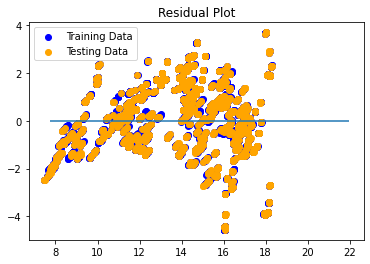

In [87]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig("D:\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Linear_Regression_Model.png")
plt.show()

In [88]:
# Make predictions

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
y_pred

array([[18.16389193],
       [15.61949118],
       [10.49299037],
       ...,
       [14.77710076],
       [16.19896267],
       [16.36900317]])

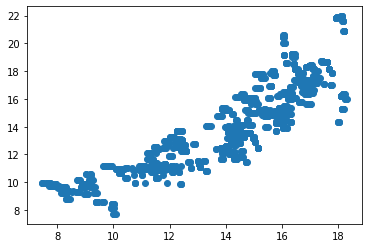

In [174]:
# The predictions variable holds the predicted values of the features stored in x_test. Since we used the train_test_split 
# method to store the real values in y_test, we compare the values of the predictions array with the values of y_test by
# using a scatterplot.

plt.scatter(y_pred, y_test)
plt.savefig("D:\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Linear_Regression_Model_validation.png")
plt.show()

# predicted values are very close to the actual values for the observations in the data set. A perfectly straight diagonal 
# line in this scatterplot would indicate that our model perfectly predicted the y-array values.

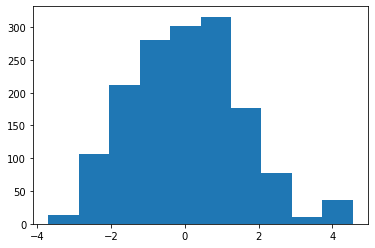

In [175]:
# plot its residuals, which are the difference between the actual y-array values and the predicted y-array values.

plt.hist(y_test - y_pred)
plt.savefig("D:\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Linear_Regression_Model_validation_hist.png")
plt.show()

# residuals from our machine learning model appear to be close to normally distributed.

In [168]:
# # Plot the results

# x_train=X_train.values.reshape(-1, 1)
# Y_train=y_train.values.reshape(-1, 1)
# x_test=X_test.reshape(-1, 1)

# plt.scatter(x_train, Y_train, color='blue')
# plt.plot(x_train, regressor.predict(x_test), color='red')
# plt.title('Poverty Rate vs. Household Income and Medicare Part B Beneficiaries')
# plt.xlabel('Household Income and Medicare Part B Beneficiaries')
# plt.ylabel('Poverty Rate')

# plt.show()